# Unsupervised Learning - Exercise

```In this exercise you will experience with K-Means, and PCA, and will do some use of them for handling practical problems.```

~```Gilad Royz & Itai Haran```

# Part 1 - Clustering

```In this question you are asked to examine the 3 clustering algorithms: KMeans, DBscan and GaussianMixture.```

```You will have to generate manipulative datasets, and demonstrate the weaknesses of each method. That is, for each one of the clustering methods, generate a dataset such that one of the methods will fail, and the others will not.
Deal with the model's hyper parameters, and conclude for yourself how sensitive they are.```

```For each dataset draw your results using your favorite visualization tool.```

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import time

colors = dict(zip(list(range(3))+[-1], [0.1, 0.4 ,0.7, 0.9]))


def compare_3_techniques(data):
    t_means = time.time()
    clf_kmeans = KMeans(3, n_jobs=-1, max_iter=100)
    y_kmeans = clf_kmeans.fit_predict(data)
    elapsed_means = time.time() - t_means

    t_dbscan = time.time()
    clf_dbscan = DBSCAN(eps = 0.3, min_samples = 10, n_jobs = -1)
    y_dbscan = clf_dbscan.fit_predict(data)
    elapsed_dbscan = time.time() - t_dbscan

    t_gaussian = time.time()
    clf_gaussian = GaussianMixture(n_components=3)
    clf_gaussian.fit(data)
    y_gaussian = clf_gaussian.predict(data)
    elapsed_gaussian = time.time() - t_gaussian

    print("means time elapsed", elapsed_means)
    print("dbscan time elapsed", elapsed_dbscan)
    print("gaussian time elapsed", elapsed_gaussian)

    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_kmeans)))
    axarr[1].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_dbscan)))
    axarr[2].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_gaussian)))
    
    axarr[0].title.set_text("means")
    axarr[1].title.set_text("DBSCAN")
    axarr[2].title.set_text("gaussian")

    plt.show()

c:\users\jeremy\documents\coursemaphat\venv\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


means time elapsed 0.03989243507385254
dbscan time elapsed 0.13811278343200684
gaussian time elapsed 0.020943641662597656


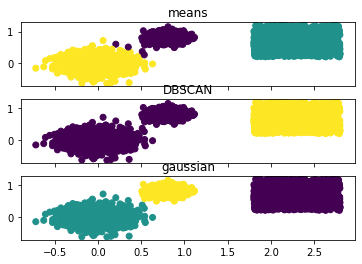

In [16]:
data = np.concatenate([np.random.normal(0, 0.2, (1000, 2)),\
                       np.random.normal(0.8, 0.1, (1000, 2)),\
                       np.random.random((1000,2)) + np.array([1.8,0.2])])

compare_3_techniques(data)

c:\users\jeremy\documents\coursemaphat\venv\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


means time elapsed 0.06635355949401855
dbscan time elapsed 0.1305246353149414
gaussian time elapsed 0.027928590774536133


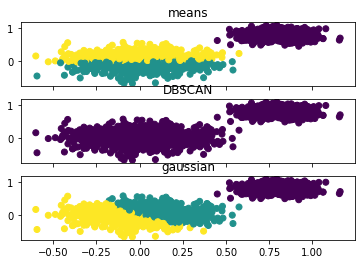

In [17]:
data = np.concatenate([np.random.normal(0, 0.2, (1000, 2)),\
                       np.random.normal(0.8, 0.1, (1000, 2))])

compare_3_techniques(data)

c:\users\jeremy\documents\coursemaphat\venv\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


means time elapsed 0.18849468231201172
dbscan time elapsed 0.16633391380310059
gaussian time elapsed 0.05601811408996582


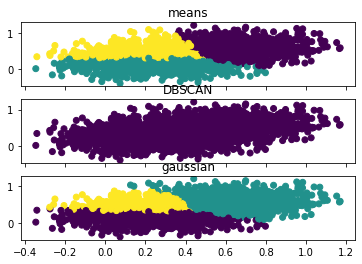

In [19]:
data = np.concatenate([np.random.normal(0.2, 0.2, (1000, 2)),\
                       np.random.normal(0.4, 0.2, (1000, 2)),\
                       np.random.normal(0.6, 0.2, (1000, 2)),\
                      ])

compare_3_techniques(data)

```Answer the following questions based on what you learned from the previous question:```
- ```Which method is easiest to use?```
- ```Which method is the fastest to use?```

In [ ]:
# DBSCAN is easier to use, since we don't need to specify the number of components.
# Gaussian mixture is the fastest one.

```We will now use K-Means to quantize image colors:```

```First load the given celebrity image from the image folder (can be found in:```
https://drive.google.com/file/d/1nUk_Q-ahhUrjmUl_sM9ovb84DybuaQCe/view?usp=sharing)

In [3]:
import cv2

In [6]:
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('images/Alicia Vikander/1.jpg')[:,:,::-1]
img_array = np.array(img)

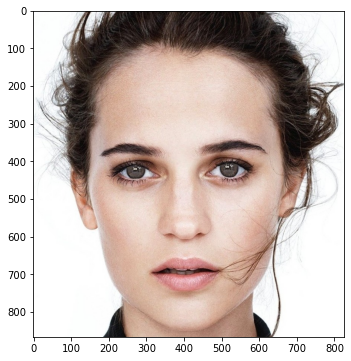

In [7]:

plt.figure(figsize=(6,6))
plt.imshow(img_array)

```Every pixel in the image is composed of three colors (Red, Green, Blue), and therefore, every pixel is a vector: (r,g,b).```
```Create a list of every color pixel in the image: (array.reshape will work)```

In [8]:
img_reshaped = img.reshape(-1,3)
print(img_reshaped.shape)

(715275, 3)


```Train a K-Means model with k=10 on the list of colors:```

In [9]:
from sklearn.cluster import KMeans

In [12]:
clf_kmeans = KMeans(3)
y_kmeans = clf_kmeans.fit_predict(img_reshaped)

```Now replace every color vector with the vector of centroid bector of it's cluster.```
```rebuild the image and plot it. How is it compared to the original?```

(715275, 3)
(867, 825, 3)


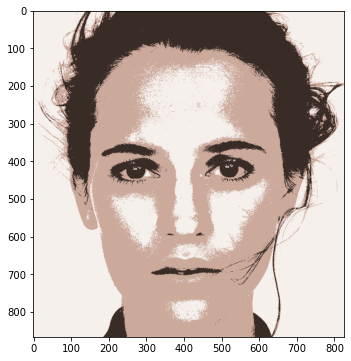

In [13]:
img_kmeans = clf_kmeans.cluster_centers_[y_kmeans]
print(img_kmeans.shape)
img_kmeans = img_kmeans.reshape(img_array.shape).astype(np.uint8)
print(img_kmeans.shape)

plt.figure(figsize=(6,6))
plt.imshow(img_kmeans)

```Train K-Means model with k=2,...,15, and plot the "within-cluster sum-of-squares criterion"```($R_k$)``` for all the k's.```

```(reduce the n_init if it takes too much time)```

(Explain on $R_k$ can be found in: https://scikit-learn.org/stable/modules/clustering.html#k-means)

```Can we conclude "how many clusters" are there, from the graph?```

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [03:55<00:00, 16.83s/it]


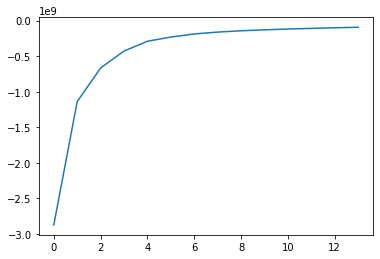

In [36]:
from tqdm import tqdm

R_k = []
for i in tqdm(range(2, 16)):
    clf_kmeans = KMeans(i)
    clf_kmeans.fit(img_reshaped)
    R_k.append(-clf_kmeans.inertia_)
    
plt.plot(R_k)

# part 2 - Dimensionality reduction

```The goal of this part is to experience with some basic features of PCA, and have a notion about the capabilities, and uses of this method.```

```We will look on facial images of 3 celebrities, and use PCA to extract facial patterns from images.```
```We then try to use those patterns to build a classifier that can distinguish the 3 celebrities.```

In [17]:
celebs = ['Alicia Vikander', 'Amy Adams', 'Andy Serkis']
# images folder in: https://drive.google.com/file/d/1nUk_Q-ahhUrjmUl_sM9ovb84DybuaQCe/view?usp=sharing

In [18]:
def read_gray_image(path):
    """
    return array with:
    0-axis: height
    1-axis: width
    2-axis: color(rgb)
    """
    return cv2.cvtColor(cv2.imread(path)[:,:,::-1], cv2.COLOR_RGB2GRAY)

```First we load the face images:```

In [19]:
import os
import cv2
import matplotlib.pyplot as plt

face_imgs = []
labels = []
for j, c in enumerate(celebs):
    
    dir_path = 'images/{}/'.format(c)
    dir_file_paths = [dir_path + i for i in os.listdir(dir_path)]
    
    temp_imgs = [read_gray_image(dir_path + i) for i in os.listdir(dir_path)]
    
    labels += [j]*len(dir_file_paths)
    face_imgs += [read_gray_image(i) for i in dir_file_paths]

```For later steps, we would like to resize all the images to have the same width x height. It is best to choose new shape that least distort the images.```

```Plot the shapes of all the images on the "width", "height" plane: (What does that remind you of?)```

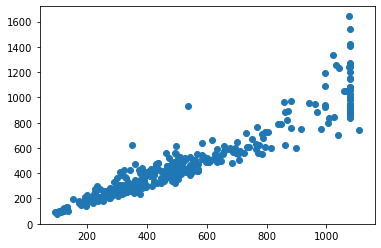

In [20]:
import numpy as np

dataset = np.array([img.shape for img in face_imgs])

plt.scatter(dataset[:,0], dataset[:,1])
plt.show()

```Now on the same plot, draw the point of the "avarage shape". Is it looks like it represents the trend?```

```Resize all the face images to have the "avarage shape." ( cv2.resize will work)```

(2,)


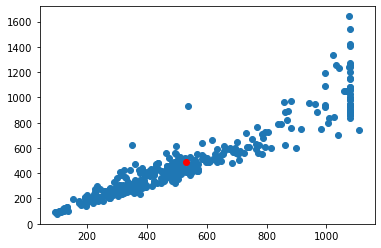

(357, 256, 256)


In [21]:
average_shape = np.mean(dataset, axis=0)
print(average_shape.shape)

plt.scatter(dataset[:,0], dataset[:,1])
plt.scatter(average_shape[0], average_shape[1], c="red")
plt.show()

new_shape = (256, 256)
dataset_resized = np.array([cv2.resize(i, (new_shape[1], new_shape[0])) for i in face_imgs])
print(dataset_resized.shape)

```Flatten all the images into vectors, and split them randomly to train and test groups (with ratio (0.7, 0.3)).```

In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [23]:
dataset_flatten = dataset_resized.reshape(dataset_resized.shape[0], -1)
print(dataset_flatten.shape)
labels = np.array(labels)
print(labels.shape)

X_train, X_test, Y_train, Y_test = train_test_split(dataset_flatten, labels, train_size=0.7)

(357, 65536)
(357,)


```Now train a PCA model with n_components=10 on the train set. How much variance(in %) the 10 components explain? is it good compared to the dimention of the vectors?```

In [35]:
dataset_flatten = dataset_flatten.astype(float)
for i in np.unique(labels):
    dataset_flatten[labels == i] -= dataset_flatten[labels == i].mean(0)
    
pca_mdl = PCA(n_components=1000)
pca_mdl.fit(X_train)

print(pca_mdl.explained_variance_ratio_.sum())

ValueError: n_components=1000 must be between 0 and min(n_samples, n_features)=249 with svd_solver='full'

```Take the 10 component vectors of the model, reshape them to the image shape, and plot all of them:```

It looks something like that:
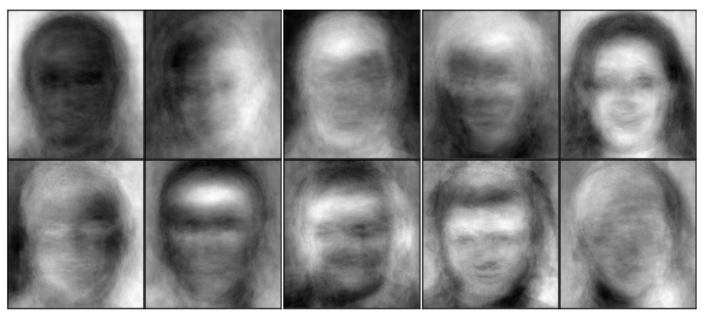

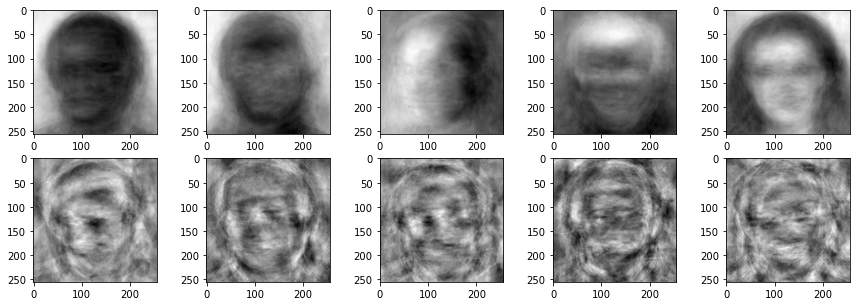

In [27]:
fig, ax = plt.subplots(2,5, figsize=(15,5))

ax[0, 0].imshow(pca_mdl.components_[0].reshape(new_shape), cmap='gray')
ax[0, 1].imshow(pca_mdl.components_[1].reshape(new_shape), cmap='gray')
ax[0, 2].imshow(pca_mdl.components_[2].reshape(new_shape), cmap='gray')
ax[0, 3].imshow(pca_mdl.components_[3].reshape(new_shape), cmap='gray')
ax[0, 4].imshow(pca_mdl.components_[4].reshape(new_shape), cmap='gray')

ax[1, 0].imshow(pca_mdl.components_[40].reshape(new_shape), cmap='gray')
ax[1, 1].imshow(pca_mdl.components_[45].reshape(new_shape), cmap='gray')
ax[1, 2].imshow(pca_mdl.components_[50].reshape(new_shape), cmap='gray')
ax[1, 3].imshow(pca_mdl.components_[55].reshape(new_shape), cmap='gray')
ax[1, 4].imshow(pca_mdl.components_[60].reshape(new_shape), cmap='gray')


```The "faces" that we got, can roוghly be refered to as the "face patterns" that are the most dominant in the images. can you make sense of the patterns?```

```Notice that if we transform an image to the low dimension and then inverse transform it back, we actually find the "best combination of the patterns" that reconstract out image```

```Now make a PCA model with n_components=10 for the images of every celebrity in the train set (pca_1, pca_2, pca_3). And Then:```

- ```Take all the vectors from the test set.```
- ```Transform them to the low dimension.```
- ```Inverse transform them back to original dimension.```
- ```Compute "mean square error" (MSE) between the original vectors to the reconstructed version of themselves.```
- ```For every vector, mark the PCA model that gave the smallest MSE. (as prediction)```
- ```Print the "confusion matrix" of the prediction.``` (https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
X_train = np.nan_to_num(X_train)

def prediction_process(n_components, verbose=True):
    def apply_pca(i, X_train, X_test):
        pca = PCA(n_components=n_components)
        pca.fit(X_train[np.array(Y_train)==i])
        transformed = pca.transform(X_test)
        recovered = pca.inverse_transform(transformed)
        MSEs = np.linalg.norm(recovered - X_test, axis=1)
        if verbose:
            print("MSEs", MSEs.shape)

        return MSEs

    MSEs_0 = apply_pca(0, X_train, X_test)
    MSEs_1 = apply_pca(1, X_train, X_test)
    MSEs_2 = apply_pca(2, X_train, X_test)

    best_img = np.argmin([MSEs_0,MSEs_1, MSEs_2], axis=0)
    best_MSE = np.min([MSEs_0, MSEs_1, MSEs_2], axis=0)

    mat = confusion_matrix(Y_test, best_img)
    accuracy = np.mean(Y_test == best_img)

    if verbose:
        print('accuracy: ', accuracy)
        print('confusion matrix:\n', mat)
        print("mean MSE", np.mean(best_MSE))
        
    return accuracy
    
prediction_process(n_components=10)

MSEs (108,)
MSEs (108,)
MSEs (108,)
accuracy:  0.7870370370370371
confusion matrix:
 [[24  6  3]
 [ 5 24  1]
 [ 5  3 37]]
mean MSE 10593.503891760889


0.7870370370370371

```Is it work well? If yes, try to explain why.```

In [31]:
"""
It worked fine. 
We trained 3 models, each one was trained on one specific celebrity. So each model would get the a low MSE when facing an image of the same celebrity from the test set. 
"""

'\nIt worked fine. \nWe trained 3 models, each one was trained on one specific celebrity. So each model would get the a low MSE when facing an image of the same celebrity from the test set. \n'

## Bonus (5 pts)

```Perform the prediction process with PCA models with n_components=[1,10,20,30,40,50,60,70].```

In [32]:
from tqdm import tqdm

n_components=[1,10,20,30,40,50,60,70]
accuracies = []
for comp in tqdm(n_components):
    accuracies.append(prediction_process(n_components=comp, verbose=False))

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


ValueError: n_components=100 must be between 0 and min(n_samples, n_features)=79 with svd_solver='full'

```Plot the accuracy of the models. what is the trend of the performance when n_components increases? Is it what you expected? try to explain.```

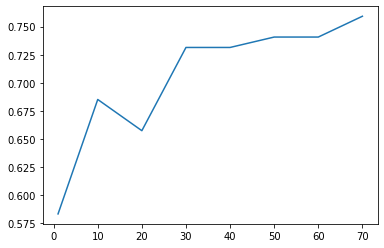

In [23]:
plt.plot(n_components, accuracies)
plt.show()

In [24]:
"""
I would expected that at some point the accuracy goes down, because the model would overfit the data. But it does not seem to be the case.
"""

'\nI would expected that at some point the accuracy goes down, because the model would overfit the data. But it does not seem to be the case.\n'